# Analisi delle Features originarie


## Preparazione dei Dati


In [1]:
# base imports
import seaborn as sns
from pathlib import PosixPath
from CU_Dataset_Factory import CU_Dataset_Factory
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, f1_score, recall_score


/home/andrea/miniconda3/envs/MNLP/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
builder = CU_Dataset_Factory(out_dir=PosixPath('./dataset'), target_feature='label', batch_size=25, features_enable=['category','type','label'], encoding=True)

dataset_tr = builder.produce(True)
dataset_te = builder.produce(False)


batch compute:   0%|          | 0/2100 [00:00<?, ?it/s, batch=12]


## Split the dataset

In [3]:
y_train = dataset_tr['label'].to_numpy()
y_test  = dataset_te['label'].to_numpy()

In [4]:
X_train = dataset_tr.drop(labels='label', axis=1)
X_test  = dataset_te.drop(labels='label', axis=1)

In [5]:
X_test

,category_architecture,category_biology,category_books,category_comics and anime,category_fashion,category_films,category_food,category_geography,category_gestures and habits,category_history,...,category_media,category_music,category_performing arts,category_philosophy and religion,category_politics,category_sports,category_transportation,category_visual arts,type_concept,type_entity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
296,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
y_test

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 0,
       1, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1,
       1, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 1, 0, 2, 2, 1,
       2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2,
       2, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 0,
       0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1, 2, 1])

## Modelli
Definiamo una serie di modelli basilari per analizzare le features già presenti nel dataset 
ed identificare quanto risultano discriminanti

In [7]:
from sklearn import tree
from sklearn.linear_model import SGDClassifier

## Decision Tree

In [8]:
dtc = tree.DecisionTreeClassifier()

In [9]:
estimator = dtc.fit(X_train, y_train)

In [10]:
estimator.get_depth()

19

## Evalute the model

In [11]:
y_pred = estimator.predict(X_test)

In [12]:

cnf = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
#auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
f1  = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
print(f'test accuracy: {acc}')
#print(f'test roc auc score: {auc}')
print(f'test F1 score: {f1}')
print(f'test Recall: {recall}')

test accuracy: 0.57
test F1 score: 0.57
test Recall: 0.57


<Axes: >

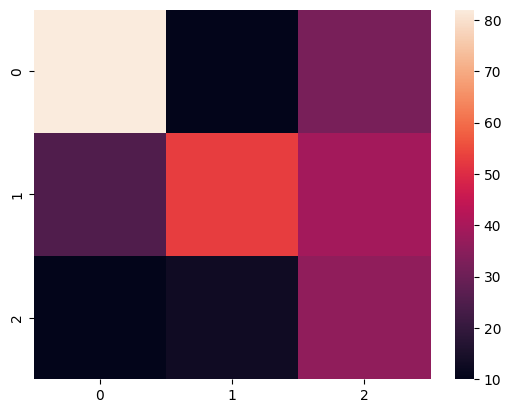

In [13]:
sns.heatmap(confusion_matrix(y_pred, y_test))


## SVM

In [14]:
svm = SGDClassifier()

In [15]:
estimator = svm.fit(X_train, y_train)

## Evalute the model

In [16]:
y_pred = estimator.predict(X_test)

In [17]:
cnf = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
#auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
f1  = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
print(f'test accuracy: {acc}')
#print(f'test roc auc score: {auc}')
print(f'test F1 score: {f1}')
print(f'test Recall: {recall}')

test accuracy: 0.56
test F1 score: 0.56
test Recall: 0.56


<Axes: >

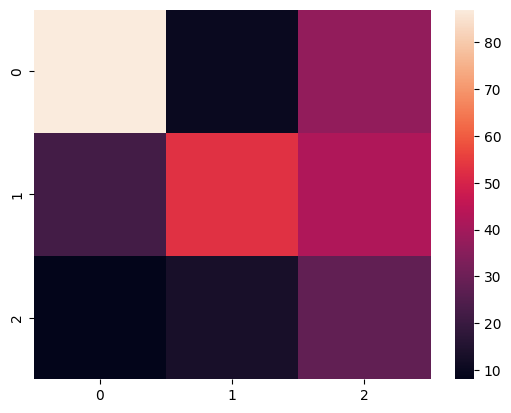

In [18]:
sns.heatmap(confusion_matrix(y_pred, y_test))

## Risultati

- La feature **'subcategory'** induce i vari modelli ad un certo livello di overfitting
- La feature **'category'** è detterminante nella classificazione

## PCA

Riduzione dell'elevata dimensionalità introdotta dalla codifica one-hot encoding

In [19]:
from matplotlib import pyplot as plt
from sklearn.decomposition import SparsePCA, KernelPCA

In [20]:
pca = SparsePCA(n_components=2, n_jobs=-1, verbose=False)

In [21]:
X_train = pca.fit_transform(X_train, y_train)
X_test = pca.fit_transform(X_test, y_test)

In [22]:
X_train

array([[-0.52487009, -0.06452102],
       [-0.52578005, -0.06501768],
       [-0.5359479 , -0.064521  ],
       ...,
       [-0.5211484 , -0.13303719],
       [-0.52578005, -0.06501768],
       [-0.52114853, -0.06452103]], shape=(6251, 2))

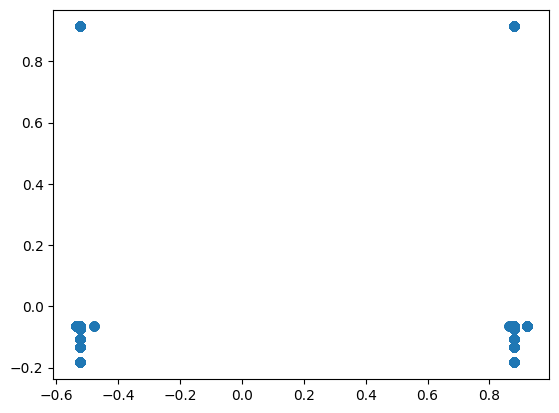

In [23]:
plt.scatter(X_train[:, 0], X_train[:,1])

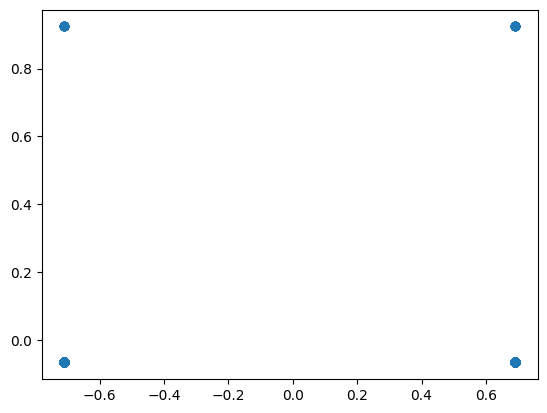

In [24]:
plt.scatter(X_test[:, 0], X_test[:,1])

## PCA + Decision Tree

In [25]:
estimator = dtc.fit(X_train, y_train)

In [26]:
estimator = svm.fit(X_train, y_train)

In [27]:
cnf = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
#auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
f1  = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
print(f'test accuracy: {acc}')
#print(f'test roc auc score: {auc}')
print(f'test F1 score: {f1}')
print(f'test Recall: {recall}')

test accuracy: 0.56
test F1 score: 0.56
test Recall: 0.56


<Axes: >

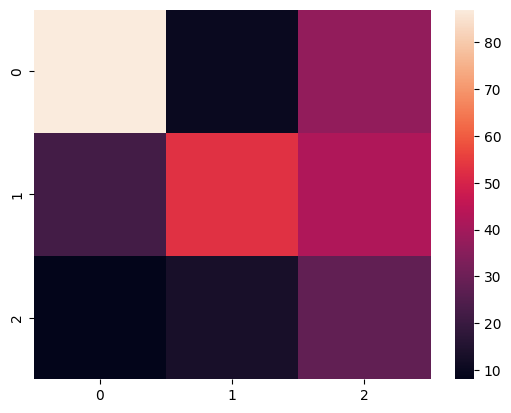

In [28]:
sns.heatmap(confusion_matrix(y_pred, y_test))

In [29]:
print(f'PCA + Decision Tree score: {estimator.score(X_test, y_test)}')

PCA + Decision Tree score: 0.5366666666666666


## PCA + SVM

In [30]:
estimator = svm.fit(X_train, y_train)

In [31]:
y_pred = estimator.predict(X_test)

In [32]:
cnf = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
#auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
f1  = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
print(f'test accuracy: {acc}')
#print(f'test roc auc score: {auc}')
print(f'test F1 score: {f1}')
print(f'test Recall: {recall}')

test accuracy: 0.5366666666666666
test F1 score: 0.5366666666666666
test Recall: 0.5366666666666666


<Axes: >

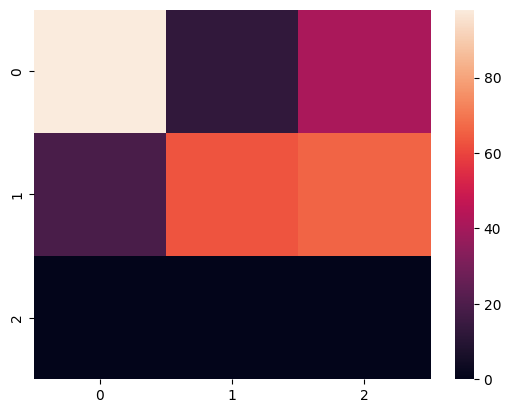

In [33]:
sns.heatmap(confusion_matrix(y_pred, y_test))

## Risultati

Valori di accuracy accettabili anche dopo la PCA che permette quindi di eliminare il problema della sparsità dei dati (indotta dalla codifica one-hot encoding) senza un'eccessiva perdita di informazioni. 

Un possibile miglioramento potrebbe essere l'impiego di reti neurali in gradi di apprendere relazioni non lineari tra l'input iniziale ed il valore proiettato